In [1]:
#import libraries
#write your code.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#load data
data=np.loadtxt("data.txt", delimiter=',')
X=data[:,:2]
y=data[:,2]
X_train=X
y_train=y

In [4]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
    positive = y == 1
    negative = y == 0
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for

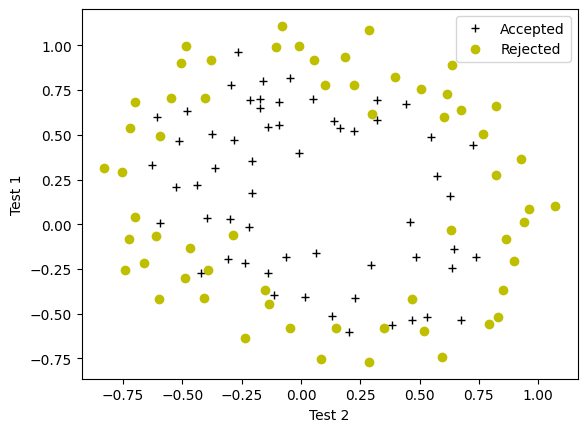

In [5]:
#test
plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()

In [20]:
#feature mapping
def map_feature(X1,X2):
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=35
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)

In [7]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [8]:
#sigmoid function
def sigmoid(z):
#write your code
  return 1/(1+np.exp(-z))


In [9]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
  y_pred=sigmoid(np.dot(X,w)+b)
  total_cost=-(1/len(y))*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))



  return total_cost

In [10]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
  y_pred=sigmoid(np.dot(X,w)+b)
  total_cost=-(1/len(y))*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))+(lambda_/(2*len(y)))*np.sum(w**2) 
  return total_cost

In [11]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  y_pred=sigmoid(np.dot(X,w)+b)
  dj_db=-1/len(y)*np.sum(y-y_pred)
  dj_dw=-1/len(y)*np.dot(X.T,y-y_pred)+lambda_/len(y)*w


  return dj_db,dj_dw

In [21]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)


In [22]:
print(X_mapped)

[[ 5.12670000e-02  6.99560000e-01  2.62830529e-03 ...  1.99021405e-08
   2.71573165e-07  3.70573123e-06]
 [-9.27420000e-02  6.84940000e-01  8.60107856e-03 ...  3.24404138e-08
  -2.39586563e-07  1.76945096e-06]
 [-2.13710000e-01  6.92250000e-01  4.56719641e-02 ...  2.44527391e-07
  -7.92073775e-07  2.56568748e-06]
 ...
 [-4.84450000e-01  9.99270000e-01  2.34691802e-01 ...  2.29103617e-01
  -4.72569659e-01  9.74764544e-01]
 [-6.33640000e-03  9.99270000e-01  4.01499650e-05 ...  3.91939646e-05
  -6.18101020e-03  9.74764544e-01]
 [ 6.32650000e-01 -3.06120000e-02  4.00246023e-01 ... -4.33264672e-51
   2.09643533e-52 -1.01440099e-53]]


In [23]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 1000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):

#write your code
  J_history=[]
  for i in range(1,iterations):
    cost=compute_cost_reg(X_mapped,y_train,initial_w,initial_b,lambda_)
    J_history.append(cost)
    dj_db,dj_dw=compute_gradient_reg(X_mapped,y_train,initial_w,initial_b,lambda_)
    initial_w=initial_w-alpha*dj_dw
    initial_b=initial_b-alpha*dj_db

  w=initial_w
  b=initial_b
  return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

In [24]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))


        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


        z = z.T


        plt.contour(u,v,z, levels = [0.5], colors="g")

C:\Users\miral\AppData\Local\Temp\ipykernel_23232\1319808980.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
C:\Users\miral\AppData\Local\Temp\ipykernel_23232\1520393006.py:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


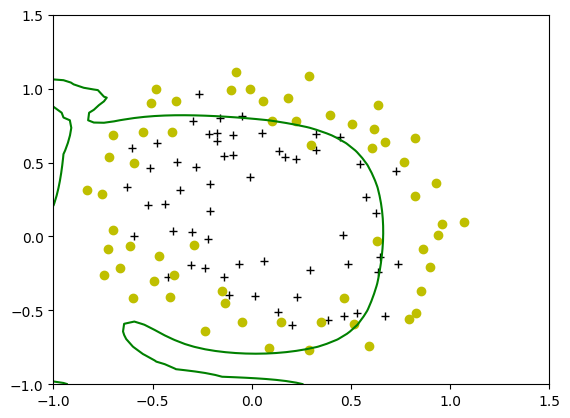

In [25]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [26]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  #write your code
  y_pred=sigmoid(np.dot(X,w)+b)
  for i in range(m):
    if y_pred[i]>=0.5:
      p[i]=1
    else:
      p[i]=0




  return p

In [27]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 69.491525
